https://quantumai.google/cirq/start/intro

In [ ]:
# @title Setting up

try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq --pre
    print("installed cirq.")
    import cirq

import matplotlib.pyplot as plt
import numpy as np

installing cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.5/598.5 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.6/596.6 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.4 MB/s eta 0:00:00
   

In [ ]:
"""Test successful installation by printing out the Sycamore device."""
import cirq_google

print(cirq_google.Sycamore)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

In [ ]:
# @title Create a Circuit

"""Creating a circuit."""
# Define three qubits.
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
c = cirq.NamedQubit("c")

# Define a list of operations.
ops = [cirq.H(a), cirq.H(b), cirq.CNOT(b, c), cirq.H(b)]

# Create a circuit from the list of operations.
circuit = cirq.Circuit(ops)
print("Circuit:\n")
print(circuit)

Circuit:

a: ───H───────────

b: ───H───@───H───
          │
c: ───────X───────


In [ ]:
# @title Exercise: Create a Circuit

# Define 4 qubits.
#q0, q1, q2, q3 = cirq.LineQubit.range(4)
q = cirq.LineQubit.range(4)

# Define a list of operations.
#ops = [cirq.H(q0), cirq.H(q1), cirq.CNOT(q1, q2), cirq.CNOT(q0, q3), cirq.H(q1)]
ops = [cirq.H(q[0]), cirq.H(q[1]), cirq.CNOT(q[1], q[2]), cirq.CNOT(q[0], q[3]), cirq.H(q[1])]

# Create a circuit from the list of operations.
circuit = cirq.Circuit(ops)
print("Circuit:\n")
print(circuit)

Circuit:

          ┌──┐
0: ───H─────@────────
            │
1: ───H────@┼────H───
           ││
2: ────────X┼────────
            │
3: ─────────X────────
          └──┘


In [ ]:
"""Get the unitary of a gate, here the Hadamard gate."""
cirq.unitary(cirq.H)

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

In [ ]:
"""Print out the moments in a circuit."""
print("Circuit:\n")
print(circuit)

# Inspecting individual moments.
print("\nMoments in the circuit:\n")
for i, moment in enumerate(circuit):
    print(f'Moment {i}: \n{moment}')

Circuit:

          ┌──┐
0: ───H─────@────────
            │
1: ───H────@┼────H───
           ││
2: ────────X┼────────
            │
3: ─────────X────────
          └──┘

Moments in the circuit:

Moment 0: 
  ╷ 0 1
╶─┼─────
0 │ H H
  │
Moment 1: 
  ╷ 0 1 2 3
╶─┼─────────
0 │ @─@─X─X
  │
Moment 2: 
  ╷ 1
╶─┼───
0 │ H
  │


In [ ]:
"""Print the repr of a circuit."""
print(repr(circuit))

cirq.Circuit([
    cirq.Moment(
        cirq.H(cirq.LineQubit(0)),
        cirq.H(cirq.LineQubit(1)),
    ),
    cirq.Moment(
        cirq.CNOT(cirq.LineQubit(1), cirq.LineQubit(2)),
        cirq.CNOT(cirq.LineQubit(0), cirq.LineQubit(3)),
    ),
    cirq.Moment(
        cirq.H(cirq.LineQubit(1)),
    ),
])


In [ ]:
# @title More ways to create Circuits

"""Creating a circuit from generator functions."""

def xor_swap(a, b):
    """Swaps two qubits with three CNOTs."""
    yield cirq.CNOT(a, b)  # |a> |b> --> |a> |a ^ b>
    yield cirq.CNOT(b, a)  # |a> |a ^ b> --> |a ^ a ^ b> | a ^ b> = |b>|a^b>
    yield cirq.CNOT(a, b)  # |b> |a ^ b> --> |b>|a ^ b ^ b> = |b> |a>

cirq.Circuit(xor_swap(a, b))

a: ───@───X───@───
      │   │   │
b: ───X───@───X───

In [ ]:
# @title Exercise: Create a circuit to left rotate 5 qubits

q = cirq.LineQubit.range(5)
#q

def left_rotate_qubits(qs):
  # https://www.geeksforgeeks.org/python-ways-to-rotate-a-list/
  rqs = qs[1:] + qs[:1]
  for qa, qb in zip(qs, rqs):
    #print(qa, "=>", qb)
    yield cirq.CNOT(qa, qb)

cirq.Circuit(left_rotate_qubits(q))

0: ───@───────────────X───
      │               │
1: ───X───@───────────┼───
          │           │
2: ───────X───@───────┼───
              │       │
3: ───────────X───@───┼───
                  │   │
4: ───────────────X───@───

In [ ]:
# solution

def left_rotate(qubits):
    """Rotates qubits to the left."""
    for i in range(len(qubits) - 1):
        a, b = qubits[i : i + 2]
        yield xor_swap(a, b)


# Get five qubits on a line.
line = cirq.LineQubit.range(5)

# Create a circuit which rotates the qubits to the left.
# uncomment the next line to compare with your circuit
circuit = cirq.Circuit(left_rotate(line))
print(circuit)

0: ───@───X───@───────────────────────────────────────
      │   │   │
1: ───X───@───X───@───X───@───────────────────────────
                  │   │   │
2: ───────────────X───@───X───@───X───@───────────────
                              │   │   │
3: ───────────────────────────X───@───X───@───X───@───
                                          │   │   │
4: ───────────────────────────────────────X───@───X───


In [ ]:
print(circuit_to_quirk_url(circuit))

http://algassert.com/quirk#circuit=%7B%22cols%22%3A%5B%5B%22%E2%80%A2%22%2C%22X%22%5D%2C%5B%22X%22%2C%22%E2%80%A2%22%5D%2C%5B%22%E2%80%A2%22%2C%22X%22%5D%2C%5B1%2C%22%E2%80%A2%22%2C%22X%22%5D%2C%5B1%2C%22X%22%2C%22%E2%80%A2%22%5D%2C%5B1%2C%22%E2%80%A2%22%2C%22X%22%5D%2C%5B1%2C1%2C%22%E2%80%A2%22%2C%22X%22%5D%2C%5B1%2C1%2C%22X%22%2C%22%E2%80%A2%22%5D%2C%5B1%2C1%2C%22%E2%80%A2%22%2C%22X%22%5D%2C%5B1%2C1%2C1%2C%22%E2%80%A2%22%2C%22X%22%5D%2C%5B1%2C1%2C1%2C%22X%22%2C%22%E2%80%A2%22%5D%2C%5B1%2C1%2C1%2C%22%E2%80%A2%22%2C%22X%22%5D%5D%7D


In [ ]:
# @title Insert strategies

"""Appending operations with InsertStrategy.EARLIEST."""
# Create an empty circuit.
circuit = cirq.Circuit()

# Append an operation.
# Note: InsertStrategy.EARLIEST is used by default if not otherwise specified.
circuit.append([cirq.CZ(a, b)])

# Append more operations.
# Note: InsertStrategy.EARLIEST is used by default if not otherwise specified.
circuit.append([cirq.H(a), cirq.H(b), cirq.H(c)])

# Display the circuit.
print("Circuit:\n")
print(circuit)

Circuit:

a: ───@───H───
      │
b: ───@───H───

c: ───H───────


In [ ]:
"""Appending operations with InsertStrategy.NEW_THEN_INLINE."""
# Create an empty circuit.
circuit = cirq.Circuit()

# Append an operation.
circuit.append([cirq.CZ(a, b)], strategy=cirq.InsertStrategy.NEW_THEN_INLINE)

# Append more operations.
circuit.append([cirq.H(a), cirq.H(b), cirq.H(c)], strategy=cirq.InsertStrategy.NEW_THEN_INLINE)

# Display the circuit.
print("Circuit:\n")
print(circuit)

Circuit:

a: ───@───H───
      │
b: ───@───H───

c: ───────H───


In [ ]:
# @title Exercise: Create the given circuit using least number of appends

# Create an empty circuit.
circuit = cirq.Circuit()

# Append an operation.
circuit.append([cirq.CZ(a, b), cirq.H(c)], strategy=cirq.InsertStrategy.EARLIEST)

circuit.append([cirq.H(a), cirq.H(b), cirq.CZ(b, c)], strategy=cirq.InsertStrategy.NEW)
circuit.append([cirq.H(a), cirq.H(b)], strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
circuit.append([cirq.H(a)], strategy=cirq.InsertStrategy.NEW)

# Display the circuit.
print("Circuit:\n")
print(circuit)

Circuit:

a: ───@───H───────────H───H───
      │
b: ───@───────H───@───H───────
                  │
c: ───H───────────@───────────


In [ ]:
# solution

# Define three qubits.
a = cirq.NamedQubit('a')
b = cirq.NamedQubit('b')
c = cirq.NamedQubit('c')

# Get an empty circuit.
circuit = cirq.Circuit()

# Append these gates using cirq.InsertStrategy.EARLIEST (the default strategy).
circuit.append([cirq.CZ(a, b), cirq.H(c), cirq.H(a)])

# Append these gates using cirq.InsertStrategy.NEW_THEN_INLINE.
circuit.append(
    [cirq.H(b), cirq.CZ(b, c), cirq.H(b), cirq.H(a), cirq.H(a)],
    strategy=cirq.InsertStrategy.NEW_THEN_INLINE,
)

# Display the circuit.
print("Circuit:\n")
print(circuit)


Circuit:

a: ───@───H───────────H───H───
      │
b: ───@───────H───@───H───────
                  │
c: ───H───────────@───────────


In [ ]:
# @title Simulations of a Circuit

"""Get a circuit to simulate."""

def basic_circuit(measure=True):
    """Returns a simple circuit with some one- and two-qubit gates,
    as well as (optionally) measurements.
    """
    # Gates we will use in the circuit.
    sqrt_x = cirq.X**0.5
    cz = cirq.CZ

    # Yield the operations.
    yield sqrt_x(a), sqrt_x(b)
    yield cz(a, b)
    yield sqrt_x(a), sqrt_x(b)
    if measure:
        yield cirq.measure(a, b)

# Create a circuit including measurements.
circuit = cirq.Circuit(basic_circuit())
print(circuit)

a: ───X^0.5───@───X^0.5───M───
              │           │
b: ───X^0.5───@───X^0.5───M───


In [ ]:
"""Example of simulating a circuit in Cirq."""
# Get a simulator.
simulator = cirq.Simulator()

# Pass the circuit to the simulator.run method.
result = simulator.run(circuit, repetitions=1)
print("Measurement results:")
print(result)

Measurement results:
a,b=0, 0


In [ ]:
"""Simulating a circuit with the `simulate` method."""
# Get a circuit without measurements.
circuit = cirq.Circuit(basic_circuit(measure=False))

# Simulate the circuit.
result = simulator.simulate(circuit, qubit_order=[a, b])

# Print the final state vector (wavefunction).
print("State vector:")
print(np.around(result.final_state_vector, 3))

# Print the state vector in Dirac notation.
print("\nDirac notation:")
print(result.dirac_notation())

State vector:
[0.5+0.j  0. +0.5j 0. +0.5j 0.5+0.j ]

Dirac notation:
0.5|00⟩ + 0.5j|01⟩ + 0.5j|10⟩ + 0.5|11⟩


Counter({1: 269, 3: 248, 2: 247, 0: 236})


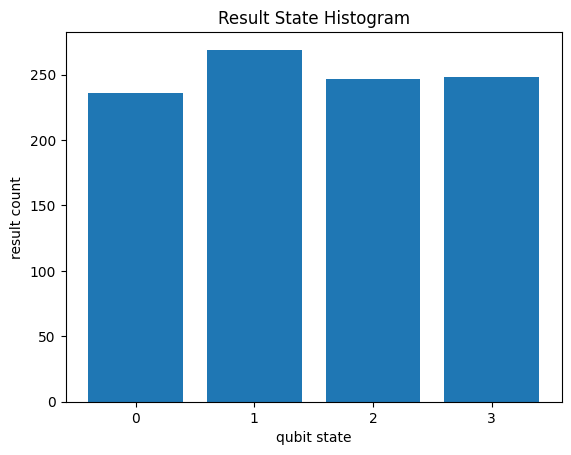

In [ ]:
# @title Repetitions and histograms

"""Simulate a circuit using 1000 repetitions."""
# Get a circuit with terminal measurements to simulate.
circuit = cirq.Circuit(basic_circuit())

# Sample from the circuit 1000 times.
result = simulator.run(circuit, repetitions=1000)

# Get a histogram of measurement results.
print(result.histogram(key="a,b"))

# Plot a state histogram of the result.
cirq.plot_state_histogram(result);

In [ ]:
#result

In [ ]:
print(
    result.histogram(
        key="a,b", fold_func=lambda bits: "agree" if bits[0] == bits[1] else "disagree"
    )
)

Counter({'disagree': 516, 'agree': 484})


In [ ]:
# @title The Deutsch-Jozsa Algorithm

"""Store the operations to query each function in a dictionary."""
# Get qubits for the operations to act on.
q0, q1 = cirq.LineQubit.range(2)

# Define the dictionary of operations. The key of each dictionary entry
# is the subscript of the function f in the above explanatory text.
oracles = {
    '0': [],
    '1': [cirq.X(q1)],
    'x': [cirq.CNOT(q0, q1)],
    'notx': [cirq.CNOT(q0, q1), cirq.X(q1)],
}

In [ ]:
"""Creating the circuit used in Deutsch's algorithm."""

def deutsch_algorithm(oracle):
    """Returns the circuit for Deutsch's algorithm given an input
    oracle, i.e., a sequence of operations to query a particular function.
    """
    yield cirq.X(q1)
    yield cirq.H(q0), cirq.H(q1)
    yield oracle
    yield cirq.H(q0)
    yield cirq.measure(q0)

for key, oracle in oracles.items():
    print(f"Circuit for f_{key}:")
    circuit = cirq.Circuit(deutsch_algorithm(oracle))
    print(circuit, end="\n\n")
    #print(circuit_to_quirk_url(circuit), end="\n\n")

Circuit for f_0:
0: ───H───H───M───

1: ───X───H───────

Circuit for f_1:
0: ───H───H───M───

1: ───X───H───X───

Circuit for f_x:
0: ───H───────@───H───M───
              │
1: ───X───H───X───────────

Circuit for f_notx:
0: ───H───────@───H───M───
              │
1: ───X───H───X───X───────



In [ ]:
"""Simulate each of the circuits."""
simulator = cirq.Simulator()
for key, oracle in oracles.items():
    result = simulator.run(cirq.Circuit(deutsch_algorithm(oracle)), repetitions=100)
    print(f'oracle: f_{key:<4} results: {result}')

oracle: f_0    results: q(0)=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
oracle: f_1    results: q(0)=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
oracle: f_x    results: q(0)=1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
oracle: f_notx results: q(0)=1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111


- For the first two functions, we always measure 0. Therefore, we know that these functions are **constant**.
- For the second two functions, we always measure 1. Therefore, we know that these functions are **balanced**.

In [ ]:
# @title Exercise: Two Bit Deutsch-Jozsa Algorithm

"""Operations to query all possible functions on two bits.
Two of these functions are constant, and six of these functions are balanced.
"""
# Define three qubits to use.
q0, q1, q2 = cirq.LineQubit.range(3)

# Define the operations to query each of the two constant functions.
constant = ([], [cirq.X(q2)])

# Define the operations to query each of the six balanced functions.
balanced = (
    [cirq.CNOT(q0, q2)],
    [cirq.CNOT(q1, q2)],
    [cirq.CNOT(q0, q2), cirq.CNOT(q1, q2)],
    [cirq.CNOT(q0, q2), cirq.X(q2)],
    [cirq.CNOT(q1, q2), cirq.X(q2)],
    [cirq.CNOT(q0, q2), cirq.CNOT(q1, q2), cirq.X(q2)],
)

In [ ]:
# Attempt the solution here
"""Exercise: Write a quantum circuit that can distinguish
constant from balanced functions on two bits.
"""

def your_circuit(oracle):
    # Your code here!
    yield oracle
    # Your code here!
    yield cirq.measure(q2)

In [ ]:
"""Check your answer by running this cell."""
simulator = cirq.Simulator()

print("\nYour result on constant functions:")
for oracle in constant:
    result = simulator.run(cirq.Circuit(your_circuit(oracle)), repetitions=10)
    print(result)

print("\nYour result on balanced functions:")
for oracle in balanced:
    result = simulator.run(cirq.Circuit(your_circuit(oracle)), repetitions=10)
    print(result)


Your result on constant functions:
q(2)=0000000000
q(2)=1111111111

Your result on balanced functions:
q(2)=0000000000
q(2)=0000000000
q(2)=0000000000
q(2)=1111111111
q(2)=1111111111
q(2)=1111111111


In [ ]:
# solution
def dj_circuit(oracle):
    # Phase kickback trick.
    yield cirq.X(q2), cirq.H(q2)

    # Get an equal superposition over input bits.
    yield cirq.H(q0), cirq.H(q1)

    # Query the function.
    yield oracle

    # Use interference to get result, put last qubit into |1>.
    yield cirq.H(q0), cirq.H(q1), cirq.H(q2)

    # Use a final OR gate to put result in final qubit.
    yield cirq.X(q0), cirq.X(q1), cirq.CCX(q0, q1, q2)
    yield cirq.measure(q2)

In [ ]:
"""Simulate the Deutsch-Jozsa circuit and check the results."""
print("Result on constant functions:")
for oracle in constant:
    result = simulator.run(cirq.Circuit(dj_circuit(oracle)), repetitions=10)
    print(result)

print("\nResult on balanced functions:")
for oracle in balanced:
    result = simulator.run(cirq.Circuit(dj_circuit(oracle)), repetitions=10)
    print(result)

Result on constant functions:
q(2)=0000000000
q(2)=0000000000

Result on balanced functions:
q(2)=1111111111
q(2)=1111111111
q(2)=1111111111
q(2)=1111111111
q(2)=1111111111
q(2)=1111111111


As with the single-bit case (Deutsch's algorithm), we always measure **0 for constant** functions and always measure **1 for balanced** functions.

In [ ]:
# @title Gates

"""Examples of common gates defined in Cirq."""
# Get some qubits.
q0, q1, q2 = cirq.LineQubit.range(3)

# Get a bunch of common gates defined in Cirq.
ops = [
    cirq.X(q0),  # Pauli-X.
    cirq.Y(q1),  # Pauli-Y.
    cirq.Z(q2),  # Pauli-Z.
    cirq.CZ(q0, q1),  # Controlled-Z gate.
    cirq.CNOT(q1, q2),  # Controlled-X gate.
    cirq.H(q0),  # Hadamard gate.
    cirq.T(q1),  # T gate.
    cirq.S(q2),  # S gate.
    cirq.CCZ(q0, q1, q2),  # Controlled CZ gate.
    cirq.SWAP(q0, q1),  # Swap gate.
    cirq.CSWAP(q0, q1, q2),  # Controlled swap gate.
    cirq.CCX(q0, q1, q2),  # Toffoli (CCNOT) gate.
    cirq.ISWAP(q0, q1),  # ISWAP gate.
    cirq.Rx(rads=0.5 * np.pi)(q0),  # Rotation about X.
    cirq.Ry(rads=0.5 * np.pi)(q1),  # Rotation about Y.
    cirq.Rz(rads=0.5 * np.pi)(q2),  # Rotation about Z.
    cirq.X(q0) ** 0.5,  # Sqrt of NOT gate.
]

# Display a circuit with all of these operations.
circuit = cirq.Circuit(ops)
print(circuit)
#print(circuit_to_quirk_url(circuit), end="\n\n")

0: ───X───@───H───────@───×───@───@───iSwap──────Rx(0.5π)───X^0.5───
          │           │   │   │   │   │
1: ───Y───@───@───T───@───×───×───@───iSwap──────Ry(0.5π)───────────
              │       │       │   │
2: ───Z───────X───S───@───────×───X───Rz(0.5π)──────────────────────


In [ ]:
"""Get the unitary of CNOT."""
print(cirq.unitary(cirq.CNOT))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


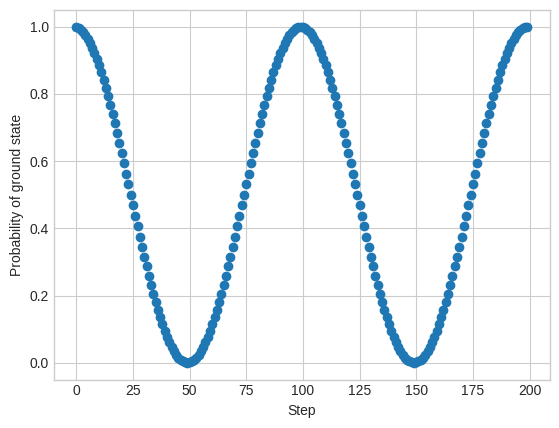

In [ ]:
"""Plot the probability of measuring a qubit in the ground state."""
# Get a qubit.
a = cirq.NamedQubit('a')

# Get a circuit of a bunch of X rotations.
num_angles = 200
circuit = cirq.Circuit([cirq.Rx(rads=np.pi / 50.0)(a) for theta in range(num_angles)])

# List to store probabilities of the ground state.
probs = []

# Step through the simulation results.
for step in simulator.simulate_moment_steps(circuit):
    prob = np.abs(step.state_vector(copy=True)) ** 2
    probs.append(prob[0])

# Plot the probability of the ground state at each simulation step.
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(probs, 'o')
plt.xlabel("Step")
plt.ylabel("Probability of ground state");

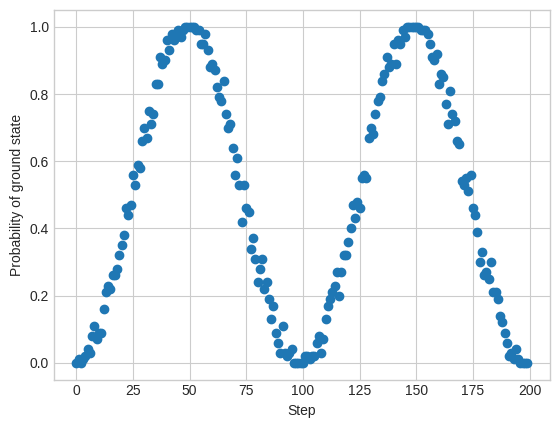

In [ ]:
"""Plot the probability of measuring a qubit in the ground state by sampling."""
# Number of times to sample.
repetitions = 100

# List to store the probability of the ground state.
sampled_probs = []

for i, step in enumerate(simulator.simulate_moment_steps(circuit)):
    samples = step.sample([a], repetitions=repetitions)
    prob = np.sum(samples, axis=0)[0] / repetitions
    sampled_probs.append(prob)


# Plot the probability of the ground state at each simulation step.
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(sampled_probs, 'o')
plt.xlabel("Step")
plt.ylabel("Probability of ground state");

In [ ]:
# @title Custom gates

"""Example of defining a custom gate in Cirq."""

class RationalGate(cirq.Gate):
    def _num_qubits_(self) -> int:
        return 1

    def _unitary_(self):
        return np.array([[3 / 5, 4 / 5], [-4 / 5, 3 / 5]])

    def __str__(self):
        return 'ζ'

In [ ]:
"""Using the custom gate in a circuit."""
a = cirq.NamedQubit('a')
rg = RationalGate()
print(cirq.Circuit(rg(a)))

a: ───ζ───


In [ ]:
print(cirq.unitary(rg))

[[ 0.6  0.8]
 [-0.8  0.6]]


In [ ]:
"""Simulate a circuit with a custom gate."""
circuit = cirq.Circuit(rg(a))
simulator = cirq.Simulator()
result = simulator.simulate(circuit)
print(result.final_state_vector)

[ 0.6+0.j -0.8+0.j]


In [ ]:
# @title Exercise: Custom Controlled Rx gate

"""Define a custom controlled cirq.rx gate here."""

class CRx(cirq.Gate):
    def __init__(self, theta):
        self.theta = theta

    def _num_qubits_(self):
        return 2

    def _unitary_(self):
        return np.array(
            [
                # Your code here!
            ]
        )

# Print out its unitary.
print(np.around(cirq.unitary(CRx(0.5 * np.pi)), 3))

[]


In [ ]:
# solution

"""Defining a custom controlled cirq.Rx gate."""

class CRx(cirq.Gate):
    def __init__(self, theta):
        self.theta = theta

    def _num_qubits_(self):
        return 2

    def _unitary_(self):
        return np.array(
            [
                [1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, np.cos(self.theta / 2), -1j * np.sin(self.theta / 2)],
                [0, 0, -1j * np.sin(self.theta / 2), np.cos(self.theta / 2)],
            ]
        )

    def _circuit_diagram_info_(self, args):
        return '@', f'Rx({self.theta / np.pi}π)'

# Print out its unitary.
print(np.around(cirq.unitary(CRx(0.5 * np.pi)), 3))

[[1.   +0.j    0.   +0.j    0.   +0.j    0.   +0.j   ]
 [0.   +0.j    1.   +0.j    0.   +0.j    0.   +0.j   ]
 [0.   +0.j    0.   +0.j    0.707+0.j    0.   -0.707j]
 [0.   +0.j    0.   +0.j    0.   -0.707j 0.707+0.j   ]]


In [ ]:
"""Display a circuit with the custom gate."""
# Get qubits.
a = cirq.NamedQubit('a')
b = cirq.NamedQubit('b')

# Display the circuit.
circuit = cirq.Circuit(CRx(0.25 * np.pi)(a, b))
print('Circuit diagram:')
print(circuit)
#print(circuit_to_quirk_url(circuit), end="\n\n")

Circuit diagram:
a: ───@───────────
      │
b: ───Rx(0.25π)───


In [ ]:
# @title Decompose Protocol

"""Example of a custom gate which supports the decompose protocol."""

class HXGate(cirq.Gate):
    def _num_qubits_(self) -> int:
        return 1

    def _decompose_(self, qubits):
        return cirq.H(*qubits), cirq.X(*qubits)

    def __str__(self):
        return 'HX'

In [ ]:
"""Use the gate in a circuit."""
HX = HXGate()

a = cirq.NamedQubit('a')
circuit = cirq.Circuit(HX(a))
assert cirq.has_unitary(HX(a))
print(circuit, cirq.unitary(circuit), sep="\n\n")

a: ───HX───

[[ 0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j]]


In [ ]:
"""Decompose the gate."""
print(cirq.Circuit(cirq.decompose(circuit)))

a: ───Y^0.5───X───X───


In [ ]:
"""Decompose the gate once."""
print(cirq.Circuit(cirq.decompose_once(HX(a))))

a: ───H───X───


In [ ]:
# @title Gatesets

# Insert a type (eg: cirq.XPowGate) to accept all instances of that type.
# Insert an instance (eg: cirq.CNOT) to accept only one specific instance of the type.
gateset = cirq.Gateset(cirq.XPowGate, cirq.YPowGate, cirq.ZPowGate, cirq.CNOT)

# Valid gates and operations are accepted by the gateset.
assert cirq.CNOT(*cirq.LineQubit.range(2)) in gateset
assert cirq.X**0.5 in gateset

# Arbitrary powers of cirq.CXPowGate are not part of the gateset.
assert cirq.CNOT**0.5 not in gateset

In [ ]:
# @title Parameterized Circuits

"""Define a circuit with parameterized gates."""
# Import sympy for parameterized values.
import sympy as sp

# Get qubits to use in the circuit.
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

# Define a parameterized value.
val = sp.Symbol("s")

# Create a circuit.
circuit = cirq.Circuit(cirq.X.on(a) ** val, cirq.X.on(b) ** val)

# Display it.
print("Circuit with parameterized gates:\n")
print(circuit)

Circuit with parameterized gates:

a: ───X^s───

b: ───X^s───


In [ ]:
"""Simulate the circuit at multiple parameter values."""
simulator = cirq.Simulator()

# Simulate the circuit for several values of the parameter.
num_params = 5
for y in range(num_params):
    result = simulator.simulate(circuit, param_resolver={"s": y / 4.0})
    print(f"s={y}: {np.around(result.final_state_vector, 2)}\n")

s=0: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]

s=1: [ 0.6 +0.6j   0.25-0.25j  0.25-0.25j -0.1 -0.1j ]

s=2: [0. +0.5j 0.5+0.j  0.5+0.j  0. -0.5j]

s=3: [-0.1 +0.1j   0.25+0.25j  0.25+0.25j  0.6 -0.6j ]

s=4: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]



In [ ]:
"""Simulate the circuit at multiple parameter values."""
# Get a list of param resolvers.
num_params = 5
resolvers = [cirq.ParamResolver({'s': y / 8.0}) for y in range(num_params)]

# Add measurements to the circuit.
circuit.append([cirq.measure(a), cirq.measure(b)])

# Simulate the circuit using run_sweep.
results = simulator.run_sweep(program=circuit, params=resolvers, repetitions=10)

for i, result in enumerate(results):
    print(f'params: {result.params.param_dict}\n{result}\n')

params: OrderedDict([('s', 0.0)])
a=0000000000
b=0000000000

params: OrderedDict([('s', 0.125)])
a=0000000000
b=0000001000

params: OrderedDict([('s', 0.25)])
a=0010000100
b=0000000000

params: OrderedDict([('s', 0.375)])
a=0001010100
b=1000001000

params: OrderedDict([('s', 0.5)])
a=1001010110
b=1111110011



In [ ]:
results = simulator.sample(program=circuit, params=resolvers, repetitions=10)

results.describe()

,s,a,b
count,50.000000,50.000000,50.000000
mean,0.250000,0.200000,0.220000
std,0.178571,0.404061,0.418452
min,0.000000,0.000000,0.000000
25%,0.125000,0.000000,0.000000
50%,0.250000,0.000000,0.000000
75%,0.375000,0.000000,0.000000
max,0.500000,1.000000,1.000000


In [ ]:
"""Alternative method of getting a sequence of param resolvers."""
linspace = cirq.Linspace(start=0, stop=1.0, length=11, key='x')
for p in linspace:
    print(p)

cirq.ParamResolver({'x': 0.0})
cirq.ParamResolver({'x': 0.1})
cirq.ParamResolver({'x': 0.2})
cirq.ParamResolver({'x': 0.3})
cirq.ParamResolver({'x': 0.4})
cirq.ParamResolver({'x': 0.5})
cirq.ParamResolver({'x': 0.6})
cirq.ParamResolver({'x': 0.7})
cirq.ParamResolver({'x': 0.8})
cirq.ParamResolver({'x': 0.9})
cirq.ParamResolver({'x': 1.0})


In [ ]:
# @title Exercise: Rotate a qubit

import pandas

q = cirq.NamedQubit("q")
theta = sp.Symbol("theta")
parameterized_circuit = cirq.Circuit(
    # your code here
    cirq.measure(q)
)

# replace None with something else
param_resolvers = None
repetitions = 100
results = cirq.Simulator().sample(
    program=parameterized_circuit, params=param_resolvers, repetitions=repetitions
)

# You can test with the following plot
#pandas.crosstab(results.theta, results.q).plot()

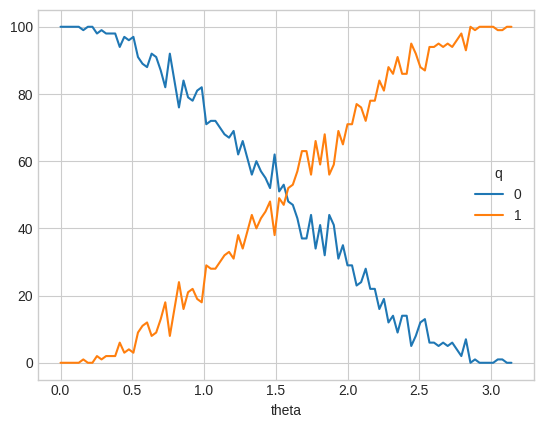

In [ ]:
# solution
import pandas

q = cirq.NamedQubit("q")
parameterized_circuit = cirq.Circuit([cirq.Rx(rads=sp.Symbol("theta"))(q), cirq.measure(q)])
param_resolvers = cirq.Linspace(start=0, stop=np.pi, length=100, key='theta')
results = cirq.Simulator().sample(
    program=parameterized_circuit, params=param_resolvers, repetitions=repetitions
)
pandas.crosstab(results.theta, results.q).plot();

In [ ]:
# @title Noise

"""Create a circuit with a depolarizing channel."""
circuit = cirq.Circuit(cirq.depolarize(0.2)(a), cirq.measure(a))
print(circuit)

a: ───D(0.2)───M───


In [ ]:
for i, kraus in enumerate(cirq.kraus(cirq.depolarize(0.2))):
    print(f"Kraus operator {i} is:", kraus, sep="\n", end="\n\n")

Kraus operator 0 is:
[[0.89442719 0.        ]
 [0.         0.89442719]]

Kraus operator 1 is:
[[0.        +0.j 0.25819889+0.j]
 [0.25819889+0.j 0.        +0.j]]

Kraus operator 2 is:
[[0.+0.j         0.-0.25819889j]
 [0.+0.25819889j 0.+0.j        ]]

Kraus operator 3 is:
[[ 0.25819889+0.j  0.        +0.j]
 [ 0.        +0.j -0.25819889+0.j]]



In [ ]:
for i, kraus in enumerate(cirq.kraus(cirq.depolarize(0.2))):
    pauli_ex = cirq.expand_matrix_in_orthogonal_basis(kraus, cirq.PAULI_BASIS)
    print(f"Kraus operator {i} is:", pauli_ex, sep="\n", end="\n\n")

Kraus operator 0 is:
0.894*I

Kraus operator 1 is:
0.258*X

Kraus operator 2 is:
0.258*Y

Kraus operator 3 is:
0.258*Z



In [ ]:
"""Example of simulating a noisy circuit with the density matrix simulator."""
# Circuit to simulate.
circuit = cirq.Circuit(cirq.depolarize(0.2)(a))
print(f'Circuit:\n{circuit}\n')

# Get the density matrix simulator.
simulator = cirq.DensityMatrixSimulator()

# Simulate the circuit and get the final density matrix.
matrix = simulator.simulate(circuit).final_density_matrix
print(f'Final density matrix:\n{matrix}')

Circuit:
a: ───D(0.2)───

Final density matrix:
[[0.8666666 +0.j 0.        +0.j]
 [0.        +0.j 0.13333333+0.j]]


In [ ]:
"""Simulating a circuit with measurements using the DensityMatrixSimulator."""
# Get a circuit with measurements.
circuit = cirq.Circuit(cirq.depolarize(0.5)(a), cirq.measure(a))

# Simulate with the density matrix multiple times.
dmat1 = simulator.simulate(circuit).final_density_matrix
dmat2 = simulator.simulate(circuit).final_density_matrix

print(np.allclose(dmat1, dmat2))

True


In [ ]:
# @title Monte carlo simulations

"""Use the cirq.mixture protocol on the cirq.depolarize channel."""
for p, u in cirq.mixture(cirq.depolarize(0.2)):
    print(f"prob = {p}\nunitary: \n{u}\n")

prob = 0.8
unitary: 
[[1. 0.]
 [0. 1.]]

prob = 0.06666666666666667
unitary: 
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

prob = 0.06666666666666667
unitary: 
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

prob = 0.06666666666666667
unitary: 
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]



In [ ]:
"""Check if cirq.depolarize has _kraus_ and _mixture_ methods."""
# Get a depolarizing channel.
d = cirq.depolarize(0.2)

# Check if it has _kraus_ implemented.
print(f"does cirq.depolarize(0.2) have _kraus_? {'yes' if getattr(d, '_kraus_', None) else 'no'}")

# Check if it has _mixture_ implemented.
print(f"does cirq.depolarize(0.2) have _mixture_? {'yes' if getattr(d, '_mixture_', None) else 'no'}")

does cirq.depolarize(0.2) have _kraus_? no
does cirq.depolarize(0.2) have _mixture_? yes


In [ ]:
"""Use the wavefunction simulator on a channel that implements the mixture protocol."""
circuit = cirq.Circuit(cirq.depolarize(0.5).on(a), cirq.measure(a))
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=10)
print(result)

a=0000100010


In [ ]:
# @title Adding noise to circuits and simulations

"""Adding noise to a circuit."""
# Get a noiseless circuit.
noise = cirq.ConstantQubitNoiseModel(cirq.depolarize(0.2))
circuit = cirq.Circuit(cirq.H(a), cirq.CNOT(a, b), cirq.measure(a, b))
print(f'Circuit with no noise:\n{circuit}\n')

# Add noise to the circuit.
system_qubits = sorted(circuit.all_qubits())
noisy_circuit = cirq.Circuit()
for moment in circuit:
    noisy_circuit.append(noise.noisy_moment(moment, system_qubits))
print(f'Circuit with noise:\n{noisy_circuit}')

Circuit with no noise:
a: ───H───@───M───
          │   │
b: ───────X───M───

Circuit with noise:
a: ───H───D(0.2)[cirq.VirtualTag()]───@───D(0.2)[cirq.VirtualTag()]───M───D(0.2)[cirq.VirtualTag()]───
                                      │                               │
b: ───────D(0.2)[cirq.VirtualTag()]───X───D(0.2)[cirq.VirtualTag()]───M───D(0.2)[cirq.VirtualTag()]───


In [ ]:
"""Perform noisy simulation by defining a density matrix simulator with a noise model."""
# Define a noise model.
noise = cirq.ConstantQubitNoiseModel(cirq.depolarize(0.2))

# Pass this noise model into the simulator.
simulator = cirq.DensityMatrixSimulator(noise=noise)

# Get a circuit to simulate.
circuit = cirq.Circuit(cirq.H(a), cirq.CNOT(a, b), cirq.measure(a, b))

# Simulate the circuit in steps.
for i, step in enumerate(simulator.simulate_moment_steps(circuit)):
    print(f'After step {i} state was\n{step.density_matrix()}\n')

After step 0 state was
[[0.43333328+0.j 0.        +0.j 0.31777775+0.j 0.        +0.j]
 [0.        +0.j 0.06666666+0.j 0.        +0.j 0.04888888+0.j]
 [0.31777775+0.j 0.        +0.j 0.43333328+0.j 0.        +0.j]
 [0.        +0.j 0.04888888+0.j 0.        +0.j 0.06666666+0.j]]

After step 1 state was
[[0.34859255+0.j 0.        +0.j 0.        +0.j 0.17089382+0.j]
 [0.        +0.j 0.15140739+0.j 0.02629136+0.j 0.        +0.j]
 [0.        +0.j 0.02629136+0.j 0.15140739+0.j 0.        +0.j]
 [0.17089382+0.j 0.        +0.j 0.        +0.j 0.34859255+0.j]]

After step 2 state was
[[0.7511109 +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.11555552+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.11555552+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.01777777+0.j]]



In [ ]:
# @title Devices

print(cirq_google.Sycamore)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

In [ ]:
"""Get the duration of an operation."""
op = cirq.X.on(cirq.GridQubit(5, 5))
gate_durations = cirq_google.Sycamore.metadata.gate_durations
for gate_family in gate_durations:
    if op in gate_family:
        print(gate_durations[gate_family])

25 ns


In [ ]:
"""Validate operations on a device."""
# Get non-adjacent qubits on the Sycamore device.
q55 = cirq.GridQubit(5, 5)
q56 = cirq.GridQubit(5, 6)
q66 = cirq.GridQubit(6, 6)

# Operations on adjacent qubits will be validated.
cirq_google.Sycamore.validate_operation(cirq.SQRT_ISWAP(q55, q56))
cirq_google.Sycamore.validate_operation(cirq.SQRT_ISWAP(q56, q66))

# Operation on non-adjacent qubits will raise an error.
ops = [cirq.SQRT_ISWAP(q55, q66)]
circuit = cirq.Circuit(ops)
print(circuit)

try:
    cirq_google.Sycamore.validate_circuit(circuit)
except ValueError as ex:
    print(f"error, as expected: \n{ex}")

(5, 5): ───iSwap───────
           │
(6, 6): ───iSwap^0.5───
error, as expected: 
Qubit pair is not valid on device: (cirq.GridQubit(5, 5), cirq.GridQubit(6, 6)).


In [ ]:
# @title Exercise: Make a Device

# solution
class SquareDevice(cirq.Device):
    """A Square Grid Device.

    The device that only allows
        1) Grid Qubits from (0, 0) to (grid_size - 1, grid_size - 1)
        2) H, CZ and MeasurementGate gates.
    """

    def __init__(self, grid_size):
        self.qubits = []
        for i in range(grid_size):
            for j in range(grid_size):
                self.qubits.append(cirq.GridQubit(i, j))

    def validate_operation(self, operation: 'cirq.Operation') -> None:
        if not isinstance(operation, cirq.GateOperation):
            raise ValueError(f"Unsupported operation {operation}")
        if not (
            operation.gate in [cirq.H, cirq.CZ] or isinstance(operation.gate, cirq.MeasurementGate)
        ):
            raise ValueError(f"Unsupported gate {operation.gate}")
        for qubit in operation.qubits:
            if qubit not in self.qubits:
                raise ValueError(f"Qubit {qubit} not on device")

In [ ]:
sd = SquareDevice(2)
print(sd)

In [ ]:
# @title Transformers for circuit compilation

"""Example of writing a custom cirq transformer."""

@cirq.transformer
def xz_optimizer(circuit, *, context=None):
    """Replaces an X followed by a Z with a Y."""

    def merge_func(op1, op2):
        return cirq.Y(*op1.qubits) if op1.gate == cirq.X and op2.gate == cirq.Z else None

    return cirq.merge_operations(circuit, merge_func)

circuit = cirq.Circuit(cirq.X(a), cirq.Z(a), cirq.CZ(a, b), cirq.X(a))
print(f"Before optimizing:\n{circuit}\n")
circuit = xz_optimizer(circuit)
print(f"After optimizing:\n{circuit}")

Before optimizing:
a: ───X───Z───@───X───
              │
b: ───────────@───────

After optimizing:
a: ───Y───────@───X───
              │
b: ───────────@───────


In [ ]:
# @title Exercise: Simplify flipped CNOTs

@cirq.transformer
def simplify_flipped_cnots(circuit, *, context=None):
    # Use transformer primitives to simplify your circuit.
    pass

"""Test your optimizer on this circuit."""
circuit = cirq.Circuit(
    cirq.H.on_each(a, b, c), cirq.CNOT(a, b), cirq.H.on_each(a, b), cirq.CZ(a, b)
)
print(simplify_flipped_cnots(circuit))

None


In [ ]:
# solution
def simplify_flipped_cnots(circuit, *, context=None):
    """Replaces a CX surrounded by Hadamards"""

    def can_merge(ops1, ops2):
        merged = cirq.Circuit(ops1, ops2)
        return (
            len(merged) <= 3
            and all(o.gate == cirq.H for o in merged[0].operations)
            and merged[1].operations[0].gate == cirq.CNOT
            and (len(merged) < 3 or all(o.gate == cirq.H for o in merged[2].operations))
        )

    merged_tag = "h_cx_h"
    circuit = cirq.merge_operations_to_circuit_op(
        circuit, can_merge, merged_circuit_op_tag=merged_tag
    )

    def map_func(op, _):
        if merged_tag not in op.tags:
            return op
        cops = [*op.untagged.mapped_circuit().all_operations()]
        return cirq.CNOT(*cops[2].qubits[::-1]) if len(cops) == 5 else cops

    return cirq.map_operations(circuit, map_func)

circuit = cirq.Circuit(
    cirq.H.on_each(a, b, c), cirq.CNOT(a, b), cirq.H.on_each(a, b), cirq.CZ(a, b)
)
print(f"Before optimizing:\n{circuit}\n")
print(f"After optimizing:\n{simplify_flipped_cnots(circuit)}")

Before optimizing:
a: ───H───@───H───@───
          │       │
b: ───H───X───H───@───

c: ───H───────────────

After optimizing:
a: ───────X───────@───
          │       │
b: ───────@───────@───

c: ───H───────────────


In [ ]:
# @title Compiling to Target Gatesets

circuit = cirq.testing.random_circuit(qubits=4, n_moments=6, op_density=0.8, random_state=1234)
print(f"Original Circuit (depth {len(circuit)}):", circuit)
cz_compiled_circuit = cirq.optimize_for_target_gateset(circuit, gateset=cirq.CZTargetGateset())
cirq.testing.assert_circuits_with_terminal_measurements_are_equivalent(
    circuit, cz_compiled_circuit, atol=1e-6)

print(f"Compiled circuit for CZ Target (depth {len(cz_compiled_circuit)}):", cz_compiled_circuit)
sqrt_iswap_compiled_circuit = cirq.optimize_for_target_gateset(
    circuit, gateset=cirq.SqrtIswapTargetGateset())
cirq.testing.assert_circuits_with_terminal_measurements_are_equivalent(
    circuit, sqrt_iswap_compiled_circuit, atol=1e-6)

print(f"Compiled circuit for Sqrt-Iswap Target (depth {len(sqrt_iswap_compiled_circuit)}):",
      sqrt_iswap_compiled_circuit)

Original Circuit (depth 6):               ┌──┐                       ┌──┐
0: ───iSwap──────────────iSwap───iSwap────@─────
      │                  │       │        │
1: ───┼─────────×────T───iSwap───iSwap────┼×────
      │         │                         ││
2: ───┼────────T┼────────X────────────────@┼────
      │         │                          │
3: ───iSwap─────×──────────────────────────×────
              └──┘                       └──┘
Compiled circuit for CZ Target (depth 17):                                                                                                                                                                                                         ┌──────────────────┐   ┌───────────────────────┐
0: ───PhXZ(a=0.25,x=-0.5,z=0)─────────@───PhXZ(a=0.25,x=0.5,z=5.55e-17)───@───PhXZ(a=-0.75,x=0.5,z=0.5)────────────────────────────────────────────────────────────────PhXZ(a=0,x=0,z=1)──────────────────────────────────────────────────────────────@───────────

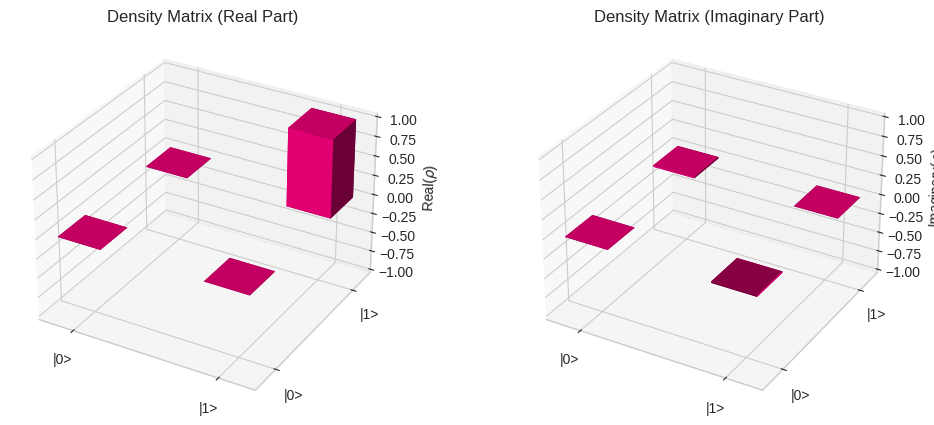

In [ ]:
# @title Other interesting things in Cirq

# Experiments

qubit = cirq.LineQubit(0)
result = cirq.experiments.single_qubit_state_tomography(
    sampler=cirq.Simulator(),  # In case of Google QCS or other hardware providers, sampler could point at real hardware.
    qubit=qubit,
    circuit=cirq.Circuit(cirq.Z(qubit), cirq.X(qubit)),
    repetitions=1000,
)
result.plot();

In [ ]:
circuit = cirq.Circuit(cirq.Z(qubit), cirq.X(qubit))
print(circuit_to_quirk_url(circuit), end="\n\n")

http://algassert.com/quirk#circuit=%7B%22cols%22%3A%5B%5B%22Z%22%5D%2C%5B%22X%22%5D%5D%7D



In [ ]:
# Testing

class InconsistentXGate(cirq.Gate):
    def _num_qubits_(self) -> int:
        return 1

    def _decompose_(self, qubits):
        yield cirq.H(qubits[0])
        yield cirq.Z(qubits[0])
        yield cirq.H(qubits[0])

    def _unitary_(self):
        return np.array([[0, -1j], [1j, 0]])  # Oops! Y instead of X!

#cirq.testing.assert_decompose_is_consistent_with_unitary(InconsistentXGate())

In [ ]:
# Export

"""Export a circuit to Qasm."""
a, b, c = cirq.LineQubit.range(3)
circuit = cirq.Circuit(cirq.H(a), cirq.H(c), cirq.CNOT(a, b), cirq.CCZ(a, b, c))
print(circuit.to_qasm())

// Generated from Cirq v1.3.0.dev20231111003417

OPENQASM 2.0;
include "qelib1.inc";


// Qubits: [q(0), q(1), q(2)]
qreg q[3];


h q[0];
h q[2];
cx q[0],q[1];

// Gate: CCZ
h q[2];
ccx q[0],q[1],q[2];
h q[2];



In [ ]:
"""Export a circuit to a Quirk URL."""
from cirq.contrib.quirk.export_to_quirk import circuit_to_quirk_url

print(circuit_to_quirk_url(circuit))

http://algassert.com/quirk#circuit=%7B%22cols%22%3A%5B%5B%22H%22%2C1%2C%22H%22%5D%2C%5B%22%E2%80%A2%22%2C%22X%22%5D%2C%5B%22%E2%80%A2%22%2C%22%E2%80%A2%22%2C%22Z%22%5D%5D%7D
